In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import arviz as az
import stan_jupyter as stan
import pandas as pd

## Easy

__4E1__

The likelihood is line 1: $y_i \sim Normal(\mu, \sigma)$

__4E2__

There are two parameters ($\mu$ and $\sigma$) in the model:


\begin{align}
y_i &\sim Normal(\mu, \sigma) \\
\mu &\sim Normal(0, 10) \\
\sigma &\sim Exponential(1)
\end{align}


__4E3__

$$ Pr(\mu, \sigma | y) = \frac{Normal(y|\mu, \sigma) Normal(\mu|0, 10)Exponential(\sigma|1)}
{\int\int Normal(y|\mu, sigma)Normal(\mu|0, 10)Exponential(\sigma|1)d\mu d\sigma}$$

__4E4__

The linear model is in the second line: $\mu_i = \alpha + \beta x_i$

__4E5__

The model below has three parameters: $\alpha, \beta$ and $\sigma $:
\begin{align}
y_i &\sim Normal(\mu, \sigma) \\
\mu &= \alpha + \beta x_i \\
\alpha &\sim Normal(0, 10) \\
\beta &\sim Normal(0,1) \\
\sigma &\sim Exponential(2)
\end{align}



## Medium

__4M1__

In [2]:
size = 10000
sample_mu = stats.norm.rvs(0, 10, size)
sample_sigma = stats.expon.rvs(1, size=size)
sample_y = stats.norm.rvs(sample_mu, sample_sigma, size)

<AxesSubplot:>

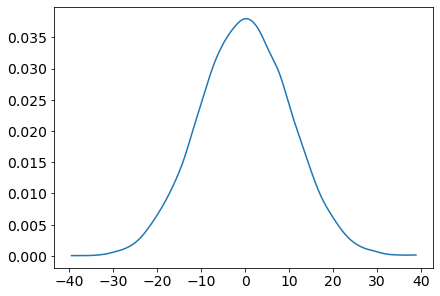

In [3]:
az.plot_kde(sample_y)

__4M2__ 

_Skipping because it is specific to R._

__4M3__

\begin{align}
y_i &\sim Normal(\mu, sigma) \\
\mu &= \alpha + \beta x_i \\
\alpha &\sim Normal(0, 10) \\
\beta &\sim Uniform(0, 1) \\
\sigma &\sim Exponential(1)
\end{align}

__4M4__

\begin{align}
height_{it} &\sim Normal(\mu_{it}, \sigma) \\
\mu_{it} &= \alpha + \beta * (year_t - \bar y) \\
\alpha &\sim Normal(140,20) \\
\beta &\sim Normal(10, 10) \\
\sigma &\sim Exponential(1) \\
\end{align}

__4M5__ 

Since logically students will get taller each year, the slope of $\beta$ should be positive. 

\begin{align}
height_{it} &\sim Normal(\mu_{it}, \sigma) \\
\mu_{it} &= \alpha + \beta * (year_t - \bar y) \\
\alpha &\sim Normal(140,20) \\
\beta &\sim HalfNormal(10, 10) \\
\sigma &\sim Exponential(1) \\
\end{align}

__4M6__

If we know the variance between students of the same age <= 64, that means the standard deviation <= 8. In that case, we can change sigma (the standard deviation) to have a uniform prior with a hard ceiling of 8 (and a floor of 0, because a negative standard deviation isn't possible).


\begin{align}
height_{it} &\sim Normal(\mu_{it}, \sigma) \\
\mu_{it} &= \alpha + \beta * (year_t - \bar y) \\
\alpha &\sim Normal(140, 20) \\
\beta &\sim HalfNormal(10, 10) \\
\sigma &\sim Uniform(0, 8) \\
\end{align}

__4M7__

In [4]:
df = pd.read_csv("../../data/Howell1.csv", delimiter=";")
df = df[df.age>=18]

In [5]:
with open('models/model_4_3.stan', 'r') as f:
    model_code = f.read()

model_data = {"N":len(df),
              "height":df.height.values.tolist(),
              "weight":df.weight.values.tolist()
             }

In [6]:
%%capture m4_3
posterior = stan.build(model_code, model_data)

fit = posterior.sample(num_chains=4, num_samples=1000)

In [7]:
with open('models/model_4_3_diff.stan', 'r') as f:
    model_code = f.read()

x_bar = df.weight.mean()

model_data = {"N":len(df),
              "height":df.height.values.tolist(),
              "weight":df.weight.values.tolist(),
              "X_BAR":x_bar
             }

In [8]:
%%capture m4_3_diff
posterior = stan.build(model_code, model_data)

fit_diff = posterior.sample(num_chains=4, num_samples=1000)

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

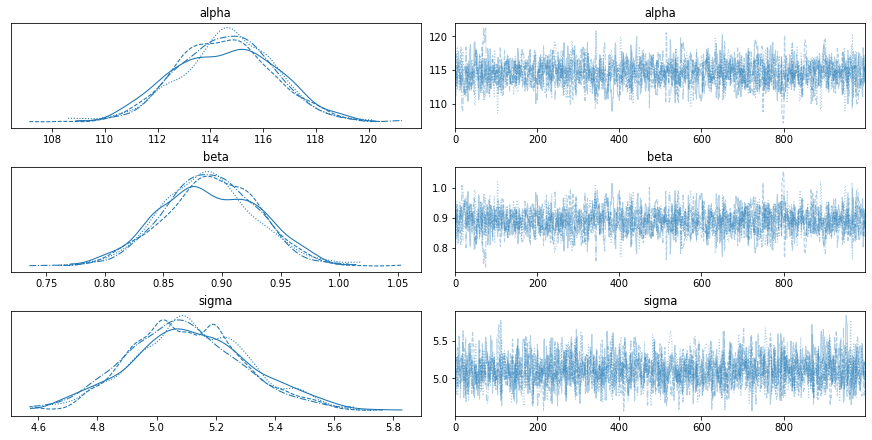

In [9]:
az.plot_trace(fit)

array([[<AxesSubplot:title={'center':'alpha'}>,
        <AxesSubplot:title={'center':'alpha'}>],
       [<AxesSubplot:title={'center':'beta'}>,
        <AxesSubplot:title={'center':'beta'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>],
       [<AxesSubplot:title={'center':'y_pred'}>,
        <AxesSubplot:title={'center':'y_pred'}>]], dtype=object)

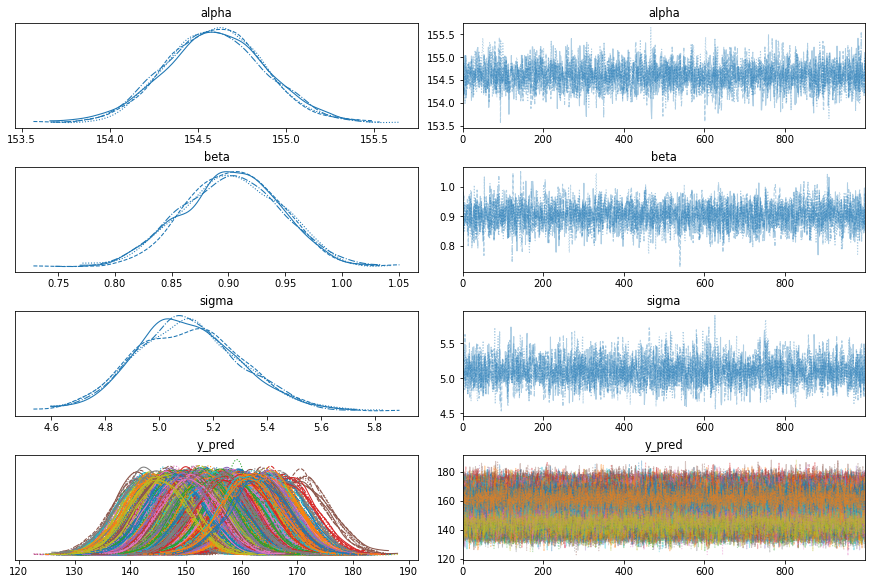

In [10]:
az.plot_trace(fit_diff)

In [11]:
az.summary(fit_diff)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,154.597,0.280,154.081,155.126,0.005,0.003,3287.0,2749.0,1.0
beta,0.903,0.043,0.824,0.983,0.001,0.001,3595.0,2595.0,1.0
sigma,5.106,0.194,4.750,5.478,0.003,0.002,3620.0,2672.0,1.0
y_pred[0],157.127,5.066,147.452,166.470,0.079,0.056,4088.0,3971.0,1.0
y_pred[1],147.020,5.164,137.569,156.743,0.082,0.058,4032.0,3893.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[347],156.561,5.140,147.101,165.922,0.082,0.058,3935.0,3827.0,1.0
y_pred[348],144.938,5.139,135.286,154.548,0.084,0.059,3769.0,3973.0,1.0
y_pred[349],161.112,5.002,151.580,170.492,0.081,0.057,3795.0,3525.0,1.0
y_pred[350],162.923,5.219,153.654,173.361,0.086,0.061,3669.0,3852.0,1.0


In [12]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,114.578,1.909,110.923,118.045,0.052,0.037,1363.0,1346.0,1.0
beta,0.890,0.042,0.810,0.966,0.001,0.001,1351.0,1360.0,1.0
sigma,5.108,0.197,4.742,5.486,0.005,0.003,1730.0,1740.0,1.0


The difference is primarily in the intercept $\alpha$, which is 154.6 in the original model (which modeled deviations from the average weight $\bar x$), but 114.5 in this version of the model. The model with $\bar x$ makes slightly more sense, because there the intercept $\alpha = 154.6$ represents the actual average height at the sample mean weight. In this model, the intercept is a slightly odd mathematical artifact that suggests that a person with a weight of 0 would still be ~114.5cm tall, which is not reasonable. The nearly identical slope $\beta$ suggests the model generally believes the same thing about the association between weight and height, but the model with $\bar x$ allows us to also say something valid about the intercept.

<Figure size 1440x720 with 0 Axes>

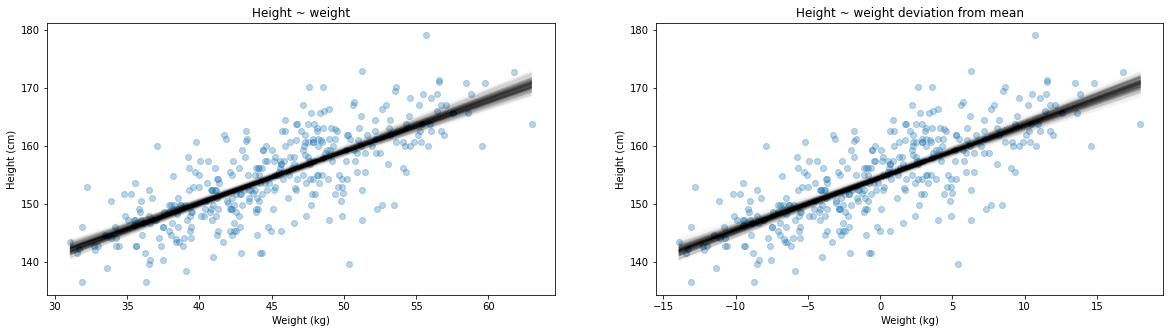

In [13]:
df_fit = fit.to_frame()
df_fit_diff = fit_diff.to_frame()

plt.figure(figsize=(20,10))
_, ax = plt.subplots(1, 2, figsize=(20,5))

idxs = np.random.randint(len(df_fit), size=500)
ax[0].plot(df.weight, df.height, "C0o", alpha=.3)
ax[1].plot(df.weight-x_bar, df.height, "C0o", alpha=.3)
ax[0].set_title("Height ~ weight")
ax[1].set_title("Height ~ weight deviation from mean")

for n in [0,1]:
    ax[n].set_ylabel("Height (cm)")
    ax[n].set_xlabel("Weight (kg)")
    
for idx in idxs:
    ax[0].plot(
        df.weight,
        df_fit['alpha'][idx] + df_fit['beta'][idx]*df.weight,
        color='black',
        alpha=.01,
    )
    ax[1].plot(
        df.weight-x_bar,
        df_fit_diff['alpha'][idx] + df_fit_diff['beta'][idx]*(df.weight-x_bar),
        color='black',
        alpha=.01,
    )

In [14]:
reg = np.array([df_fit['alpha'], df_fit['beta'], df_fit['sigma']])
diff = np.array([df_fit_diff['alpha'], df_fit_diff['beta'], df_fit_diff['sigma']])

In [15]:
reg_cov = np.cov(reg)
reg_cov.round(2)

array([[ 3.64, -0.08, -0.  ],
       [-0.08,  0.  ,  0.  ],
       [-0.  ,  0.  ,  0.04]])

In [16]:
diff_cov = np.cov(diff)
diff_cov.round(2)

array([[ 0.08, -0.  ,  0.  ],
       [-0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.04]])

In [17]:
def correlation_from_covariance(covariance): # from https://gist.github.com/wiso/ce2a9919ded228838703c1c7c7dad13b
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [18]:
correlation_from_covariance(diff_cov).round(2)

array([[ 1.  , -0.01,  0.01],
       [-0.01,  1.  ,  0.  ],
       [ 0.01,  0.  ,  1.  ]])

In [19]:
correlation_from_covariance(reg_cov).round(2)

array([[ 1.  , -0.99, -0.  ],
       [-0.99,  1.  ,  0.01],
       [-0.  ,  0.01,  1.  ]])

__4M8__

## Hard

__4H1__

In [20]:
fit_diff

<stan.Fit>
Parameters:
    alpha: ()
    beta: ()
    sigma: ()
    y_pred: (352,)
Draws: 4000

In [21]:
weights = [46.95,
           43.72,
           64.78,
           32.59,
           54.63]

In [22]:
for weight in weights:
    y_pred = stats.norm.rvs(loc=fit_diff['alpha'] + fit_diff['beta']*(weight-x_bar),
                             scale=fit_diff['sigma'])
    print(f"For weight={weight}kg, predicted height={y_pred.mean().round(2)}cm.")

For weight=46.95kg, predicted height=156.39cm.
For weight=43.72kg, predicted height=153.43cm.
For weight=64.78kg, predicted height=172.33cm.
For weight=32.59kg, predicted height=143.26cm.
For weight=54.63kg, predicted height=163.29cm.


__4H2__

__a)__

In [23]:
df = pd.read_csv("../../data/Howell1.csv", delimiter=";")
df = df[df.age<18]

with open('models/model_4_3_diff.stan', 'r') as f:
    model_code = f.read()

x_bar = df.weight.mean()

model_data = {"N":len(df),
              "height":df.height.values.tolist(),
              "weight":df.weight.values.tolist(),
              "X_BAR":x_bar
             }



In [24]:
%%capture m4_3_diff_b
posterior = stan.build(model_code, model_data)

fit_u18 = posterior.sample(num_chains=4, num_samples=1000)

In [25]:
az.summary(fit_u18)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,108.384,0.629,107.258,109.634,0.010,0.007,4262.0,2911.0,1.0
beta,2.717,0.071,2.582,2.846,0.001,0.001,4145.0,2758.0,1.0
sigma,8.536,0.436,7.711,9.337,0.007,0.005,4263.0,2972.0,1.0
y_pred[0],111.687,8.583,94.550,126.731,0.133,0.094,4162.0,3364.0,1.0
y_pred[1],96.372,8.540,79.957,112.485,0.136,0.096,3920.0,3589.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[187],105.990,8.411,90.684,122.488,0.130,0.092,4191.0,3831.0,1.0
y_pred[188],77.932,8.579,61.833,94.074,0.139,0.099,3783.0,3505.0,1.0
y_pred[189],80.345,8.437,64.916,96.396,0.136,0.096,3857.0,4015.0,1.0
y_pred[190],142.940,8.491,126.755,158.265,0.134,0.095,4002.0,3971.0,1.0


This model expects the average u18 person in the Howell data to be 108cm tall, with a standard deviation of 8.5 around that mean. For every 10 unit increase in weight, the model expects a ~ 27 unit increase in height. 

__b)__

In [26]:
weights = sorted(df.weight)
y_pred = [n.mean() for n in fit_u18['y_pred']]
mu_ci = [np.percentile(fit_u18['alpha']+fit_u18['beta']*(n-x_bar), 
                       [5.5, 94.5]).tolist() for n in weights]


/Users/jikaasik/miniconda/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'Height (cm)')

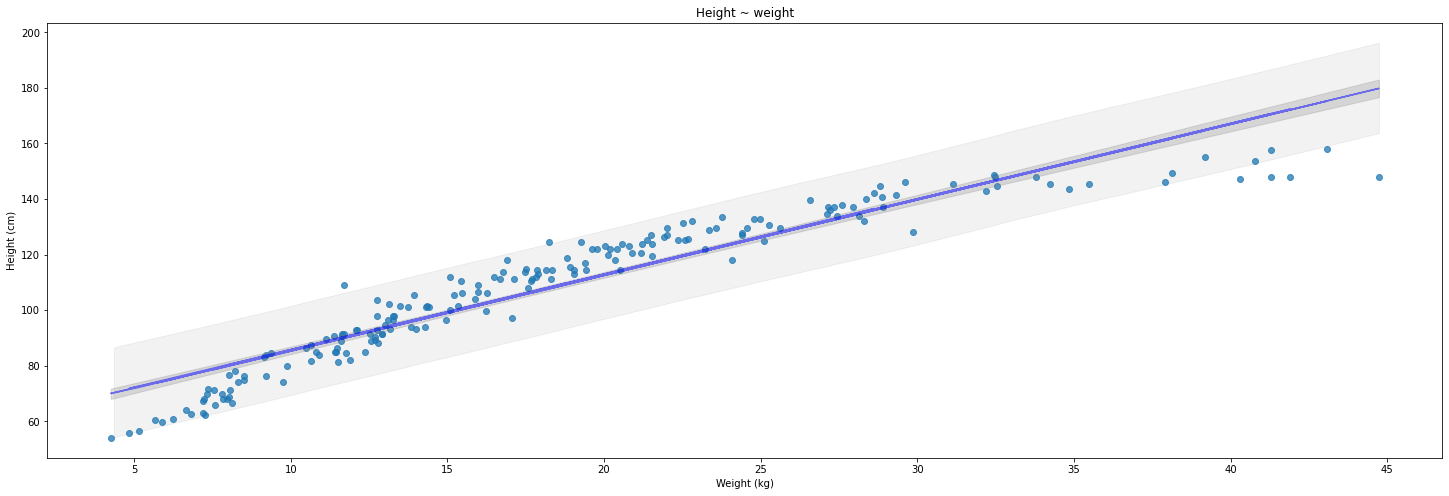

In [27]:
plt.figure(figsize=(25,8))
az.plot_hdi(df.weight, fit_u18['y_pred'].T, fill_kwargs={'color':'gray', 'alpha':.1})
plt.scatter(df.weight, df.height, alpha=.75)
plt.plot(df.weight, 
         y_pred,
         color='b',
         alpha=.5)
plt.fill_between(weights, [n[0] for n in mu_ci], [n[1] for n in mu_ci], alpha=.25, color='gray')
plt.title("Height ~ weight")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

__c)__

It's obvious from plotting the data that the relationship between weight and height is not linear, but the model thinks it is. As a result, it doesn't do a good job in almost any region of weight. It systematically underpredicts high and low values of weight and underpredicts average values. We need to introduce the possibility of curvature into the model.

__4H3__

In [28]:
df = pd.read_csv("../../data/Howell1.csv", delimiter=";")

In [29]:
with open('models/model_4_3_log.stan', 'r') as f:
    model_code = f.read()

x_bar = np.log(df.weight).mean()

model_data = {"N":len(df),
              "height":df.height.values.tolist(),
              "weight":np.log(df.weight.values.tolist()),
              "X_BAR":x_bar
             }



In [30]:
%%capture m4_3_log
posterior = stan.build(model_code, model_data)

fit_log = posterior.sample(num_chains=4, num_samples=1000)

In [31]:
az.summary(fit_log)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,138.266,0.221,137.847,138.674,0.003,0.002,4312.0,2512.0,1.0
beta,47.071,0.386,46.346,47.781,0.006,0.004,3896.0,2938.0,1.0
sigma,5.153,0.156,4.870,5.447,0.003,0.002,3611.0,2642.0,1.0
y_pred[0],158.170,5.149,148.098,167.860,0.081,0.057,4010.0,3280.0,1.0
y_pred[1],145.590,5.276,135.542,155.261,0.085,0.060,3896.0,3771.0,1.0
...,...,...,...,...,...,...,...,...,...
y_pred[539],138.011,5.189,128.128,147.649,0.082,0.058,3946.0,3932.0,1.0
y_pred[540],162.239,5.181,151.948,171.374,0.082,0.058,3980.0,4056.0,1.0
y_pred[541],164.035,5.168,154.373,173.770,0.085,0.060,3662.0,3508.0,1.0
y_pred[542],74.377,5.117,64.191,83.547,0.079,0.056,4207.0,3553.0,1.0


For a 1 unit (log(kg)) difference in weight, we would expect to see a ~47cm difference in height.

In [32]:
weights = sorted(df.weight)
mu_ci = [np.percentile(fit_log['alpha']+fit_log['beta']*(np.log(n)-x_bar), 
                       [1.5, 98.5]).tolist() for n in weights]

/Users/jikaasik/miniconda/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


Text(0, 0.5, 'Height (cm)')

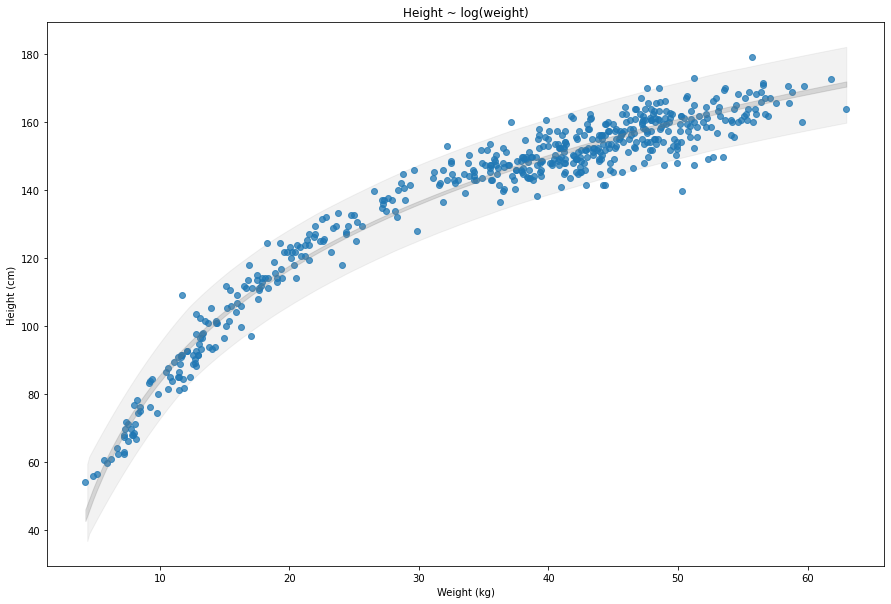

In [33]:
plt.figure(figsize=(15,10))
az.plot_hdi(df.weight, fit_log['y_pred'].T, .97, fill_kwargs={'color':'gray', 'alpha':.1})
plt.scatter(df.weight, df.height, alpha=.75)

plt.fill_between(weights, [n[0] for n in mu_ci], [n[1] for n in mu_ci], alpha=.25, color='gray')
plt.title("Height ~ log(weight)")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")

__4H4__

__4H5__

__4H6__

__4H7__

__4H8__